In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir("../input"))

import warnings 
warnings.filterwarnings('ignore')


['advertising.csv']


In [2]:
train=pd.read_csv('../input/advertising.csv')
train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
train.shape

(1000, 10)

In [4]:
train.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
#lets categorise the data

num_cols=[var for var in train.columns if train[var].dtypes !='O']
cat_cols=[var for var in train.columns if train[var].dtypes !='int64' and train[var].dtypes !='float64']

print('No of numerical columns: ',len(num_cols))
print('No of categorical columns: ',len(cat_cols))
print('Total no of columns: ',len(num_cols+cat_cols))

No of numerical columns:  6
No of categorical columns:  4
Total no of columns:  10


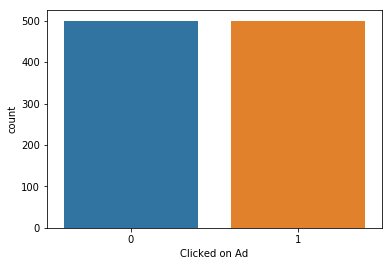

In [7]:
sns.countplot(train['Clicked on Ad'])

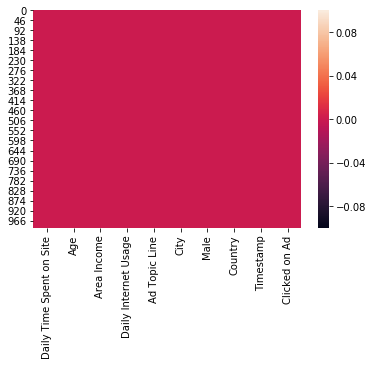

In [8]:
#Missing Data

sns.heatmap(train.isnull())

In [9]:
train.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

(array([12.,  6., 32., 21., 27., 70., 48., 87., 60., 38., 82., 39., 86.,
        37., 30., 68., 26., 44., 30., 18., 29., 18., 32., 15., 10., 16.,
         2., 10.,  2.,  5.]),
 array([19. , 20.4, 21.8, 23.2, 24.6, 26. , 27.4, 28.8, 30.2, 31.6, 33. ,
        34.4, 35.8, 37.2, 38.6, 40. , 41.4, 42.8, 44.2, 45.6, 47. , 48.4,
        49.8, 51.2, 52.6, 54. , 55.4, 56.8, 58.2, 59.6, 61. ]),
 <a list of 30 Patch objects>)

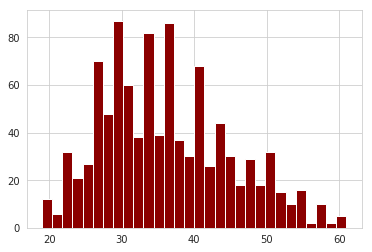

In [10]:
sns.set_style('whitegrid')
plt.hist(train['Age'],color='darkred',bins=30,)

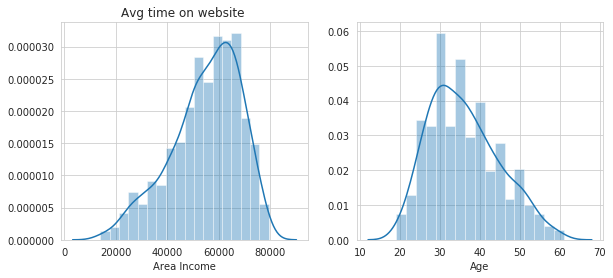

In [11]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title('Avg time on website ')
sns.distplot(train['Area Income'])
plt.subplot(1,3,2)
sns.distplot(train['Age'])


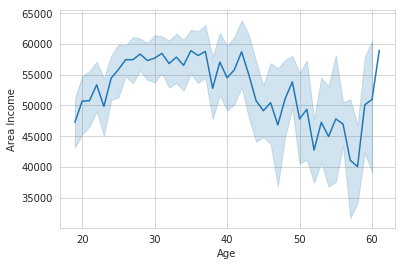

In [12]:
sns.lineplot(train['Age'],train['Area Income'])

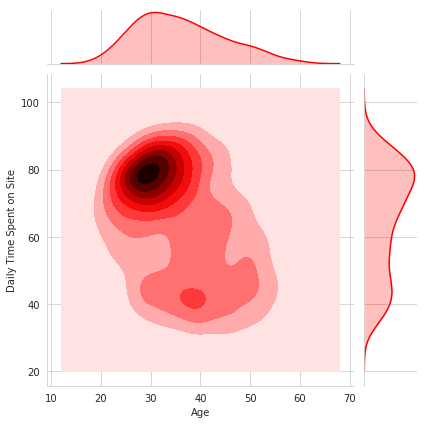

In [13]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=train,color='red',kind='kde')

## Model Selection

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = train[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = train['Clicked on Ad']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluation

In [19]:
predictions = logmodel.predict(X_test)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       162
           1       0.96      0.86      0.91       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
print(confusion_matrix(y_test,predictions))

[[156   6]
 [ 24 144]]


In [24]:
final_df = pd.DataFrame({
        "Clicked on Ad": predictions
    })

In [25]:
# Save the dataframe to a csv file
final_df.to_csv('submission.csv',index=False)